In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

Dataset:
61
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


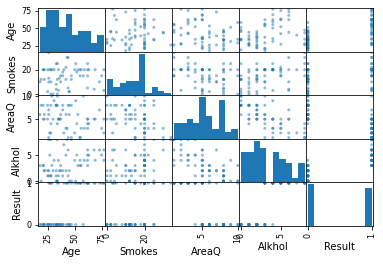

In [4]:
print("Dataset:")
dataset = pd.read_csv(r"C:\Users\hp\Desktop\python project\lung_cancer_updated.csv")
print(len(dataset))
print(dataset.head())
scatter_matrix(dataset)
pyplot.show()

In [5]:
df=pd.read_csv("lung_cancer_updated.csv")

In [6]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
...,...,...,...,...,...,...,...
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0
59,Mike,Weiber,45,2,8,2,0


In [7]:
df.shape

(61, 7)

In [8]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [9]:
df.values

array([['John', 'Wick', 35, 3, 5, 4, 1],
       ['John', 'Constantine', 27, 20, 2, 5, 1],
       ['Camela', 'Anderson', 30, 0, 5, 2, 0],
       ['Alex', 'Telles', 28, 0, 8, 1, 0],
       ['Diego', 'Maradona', 68, 4, 5, 6, 1],
       ['Cristiano', 'Ronaldo', 34, 0, 10, 0, 0],
       ['Mihail', 'Tal', 58, 15, 10, 0, 0],
       ['Kathy', 'Bates', 22, 12, 5, 2, 0],
       ['Nicole', 'Kidman', 45, 2, 6, 0, 0],
       ['Ray', 'Milland', 52, 18, 4, 5, 1],
       ['Fredric', 'March', 33, 4, 8, 0, 0],
       ['Yul', 'Brynner', 18, 10, 6, 3, 0],
       ['Joan', 'Crawford', 25, 2, 5, 1, 0],
       ['Jane', 'Wyman', 28, 20, 2, 8, 1],
       ['Anna', 'Magnani', 34, 25, 4, 8, 1],
       ['Katharine ', 'Hepburn', 39, 18, 8, 1, 0],
       ['Katharine ', 'Hepburn', 42, 22, 3, 5, 1],
       ['Barbra', 'Streisand', 19, 12, 8, 0, 0],
       ['Maggie ', 'Smith', 62, 5, 4, 3, 1],
       ['Glenda ', 'Jackson', 73, 10, 7, 6, 1],
       ['Jane ', 'Fonda', 55, 15, 1, 3, 1],
       ['Maximilian ', 'Schell', 33, 

In [10]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,42.442623,14.934426,5.327869,3.213115,0.475410
std,16.060847,8.053713,2.521384,2.346023,0.503539
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,8.000000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


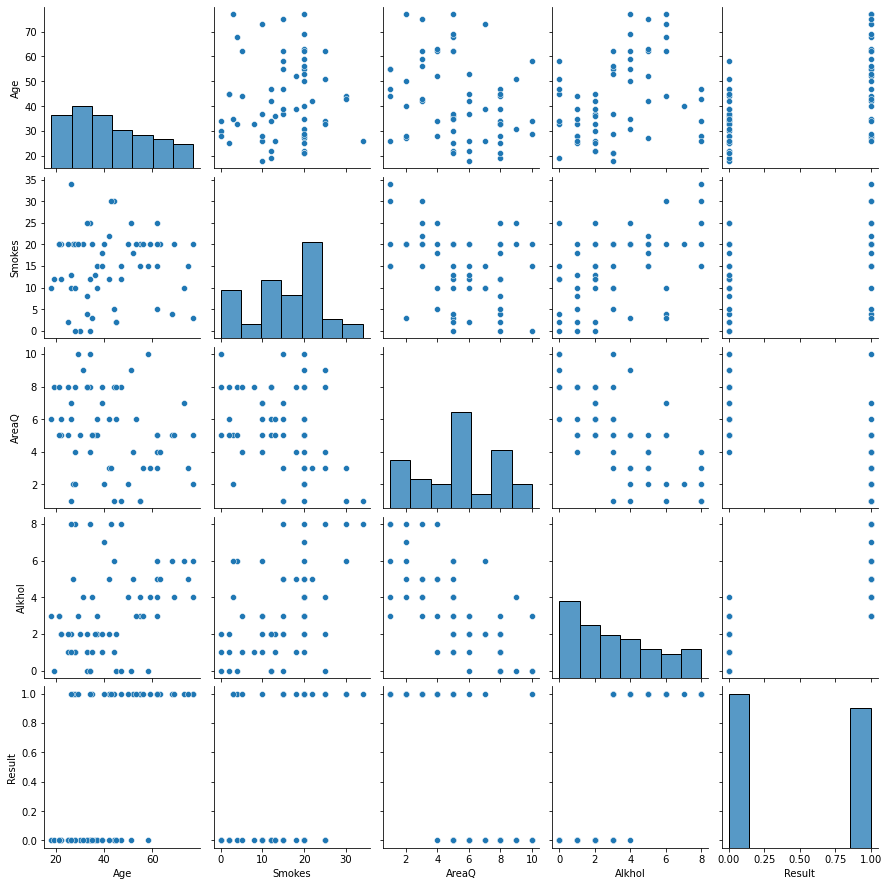

In [11]:
sns.pairplot(dataset)

In [12]:
A = dataset[dataset.Result == 1]
B = dataset[dataset.Result == 0]

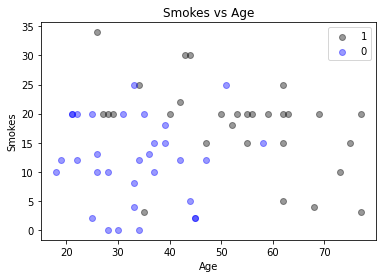

In [13]:
plt.scatter(A.Age, A.Smokes, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Smokes, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")
plt.show()

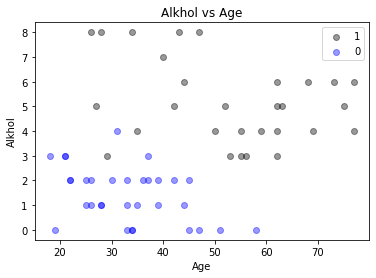

In [14]:
plt.scatter(A.Age, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Age")
plt.show()

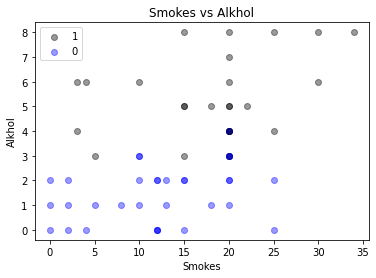

In [15]:
plt.scatter(A.Smokes, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Smokes, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.xlabel("Smokes")
plt.ylabel("Alkhol")
plt.legend()
plt.legend()
plt.title("Smokes vs Alkhol")
plt.show()

In [16]:
x = dataset.iloc[:, 3:5]
y = dataset.iloc[:, 6]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

In [17]:
print("-------------------**** using KNN Algorithm****'------------")
import math

a = math.sqrt(len(y_train))
print(a)
classifer = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')
classifer.fit(x_train, y_train)
y_pred = classifer.predict(x_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)

-------------------**** using KNN Algorithm****'------------
6.928203230275509
[0 0 0 1 0 0 0 0 1 1 0 0 0]


In [18]:
print("Confusion Matrix:")
print(cm)
print("in confusion matrix-------")
print("position 1.1 shows are the patients that don't have cancer, tin this case=8")
print("position 1.2 shows the number of patients that have higher risk of cancer, in this case=1")
print("position 2.1 shows the incorrect value in this casre=2")
print("position 2.23 shows the correct number  of patients that have cancer,in this case=2")
print('F1 Score: ', (f1_score(y_test, y_pred)) * 100)
print('ACCURACY:', (accuracy_score(y_test, y_pred)) * 100)

Confusion Matrix:
[[8 1]
 [2 2]]
in confusion matrix-------
position 1.1 shows are the patients that don't have cancer, tin this case=8
position 1.2 shows the number of patients that have higher risk of cancer, in this case=1
position 2.1 shows the incorrect value in this casre=2
position 2.23 shows the correct number  of patients that have cancer,in this case=2
F1 Score:  57.14285714285715
ACCURACY: 76.92307692307693


In [19]:
print("------------****Using decision tree Algorithm****---------")
c = tree.DecisionTreeClassifier()
c.fit(x_train, y_train)
accu_train = np.sum(c.predict(x_train) == y_train) / float(y_train.size)
accu_test = np.sum(c.predict(x_test) == y_test) / float(y_test.size)
print('classification accuracy on train', (accu_train) * 100)
print('classification accuracy on test', (accu_test) * 100)

------------****Using decision tree Algorithm****---------
classification accuracy on train 95.83333333333334
classification accuracy on test 69.23076923076923


In [20]:
df=pd.read_csv("lung_cancer_updated.csv")

In [21]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
...,...,...,...,...,...,...,...
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0
59,Mike,Weiber,45,2,8,2,0


In [22]:
x = df.drop(columns=['Result','Name','Surname'])
y = df['Result']


In [23]:

print(x)
print(y)

    Age  Smokes  AreaQ  Alkhol
0    35       3      5       4
1    27      20      2       5
2    30       0      5       2
3    28       0      8       1
4    68       4      5       6
..  ...     ...    ...     ...
56   75      15      3       5
57   43      30      3       8
58   51      25      9       0
59   45       2      8       2
60   29      20     10       3

[61 rows x 4 columns]
0     1
1     1
2     0
3     0
4     1
     ..
56    1
57    1
58    0
59    0
60    1
Name: Result, Length: 61, dtype: int64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=None)


In [25]:
model1 = LogisticRegression(solver='lbfgs', max_iter=10000)
model1.fit(x_train, y_train)
x_train_prediction1 = model1.predict(x_train)
x_test_prediction1 = model1.predict(x_test)
training_data_accuracy1 = accuracy_score(x_train_prediction1, y_train)
testing_data_accuracy1 = accuracy_score(x_test_prediction1, y_test)
print('accuracy on training data: ', training_data_accuracy1)
print('accuracy on testing data: ', testing_data_accuracy1)


accuracy on training data:  0.9791666666666666
accuracy on testing data:  0.9230769230769231


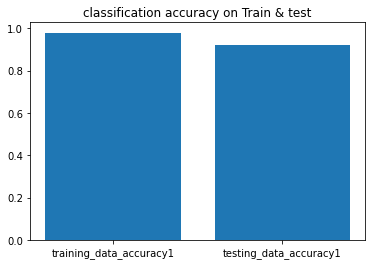

In [26]:
import matplotlib.pyplot as plt
x=["training_data_accuracy1","testing_data_accuracy1"]
h=[ 0.9791666666666666,0.9230769230769231]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")
plt.show()

In [27]:
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
x_train_prediction2 = model2.predict(x_train)
x_test_prediction2 = model2.predict(x_test)
training_data_accuracy2 = accuracy_score(x_train_prediction2, y_train)
testing_data_accuracy2 = accuracy_score(x_test_prediction2, y_test)
print('accuracy on training data: ', training_data_accuracy2)
print('accuracy on testing data: ', testing_data_accuracy2)

accuracy on training data:  0.8958333333333334
accuracy on testing data:  0.8461538461538461


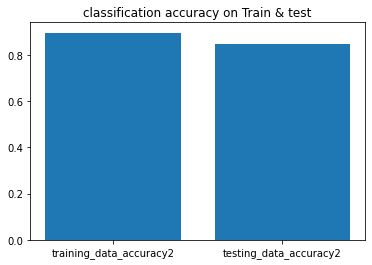

In [38]:
import matplotlib.pyplot as plt
x=["training_data_accuracy2","testing_data_accuracy2"]
h=[ 0.8958333333333334, 0.8461538461538461]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")
plt.show()

In [29]:
model3 = SVC(random_state=None)
model3.fit(x_train, y_train)
x_train_prediction3 = model3.predict(x_train)
x_test_prediction3 = model3.predict(x_test)
training_data_accuracy3 = accuracy_score(x_train_prediction3, y_train)
testing_data_accuracy3 = accuracy_score(x_test_prediction3, y_test)
print('accuracy on training data: ', training_data_accuracy3)
print('accuracy on testing data: ', testing_data_accuracy3)

accuracy on training data:  0.9166666666666666
accuracy on testing data:  0.8461538461538461


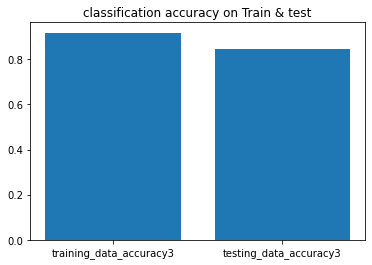

In [41]:
import matplotlib.pyplot as plt
x=["training_data_accuracy3","testing_data_accuracy3"]
h=[  0.9166666666666666,0.8461538461538461]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")
plt.show()

In [31]:
model4 = GaussianNB()
model4.fit(x_train, y_train)
x_train_prediction4 = model4.predict(x_train)
x_test_prediction4 = model4.predict(x_test)
training_data_accuracy4 = accuracy_score(x_train_prediction4, y_train)
testing_data_accuracy4 = accuracy_score(x_test_prediction4, y_test)
print('accuracy on training data: ', training_data_accuracy4)
print('accuracy on testing data: ', testing_data_accuracy4)

accuracy on training data:  0.9791666666666666
accuracy on testing data:  0.9230769230769231


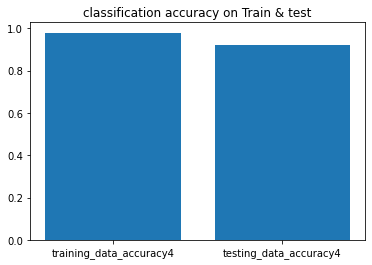

In [32]:
import matplotlib.pyplot as plt
x=["training_data_accuracy4","testing_data_accuracy4"]
h=[ 0.9791666666666666, 0.9230769230769231]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")
plt.show()

In [33]:
model5 = RandomForestClassifier(random_state=None)
model5.fit(x_train, y_train)
x_train_prediction5 = model5.predict(x_train)
x_test_prediction5 = model5.predict(x_test)
training_data_accuracy5 = accuracy_score(x_train_prediction5, y_train)
testing_data_accuracy5 = accuracy_score(x_test_prediction5, y_test)
print('accuracy on training data: ', training_data_accuracy5)
print('accuracy on testing data: ', testing_data_accuracy5)

accuracy on training data:  1.0
accuracy on testing data:  0.9230769230769231


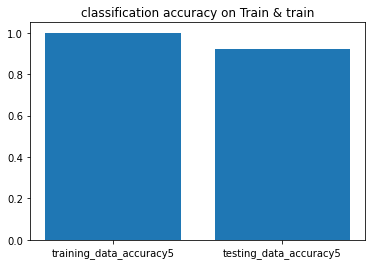

In [34]:
import matplotlib.pyplot as plt
x=["training_data_accuracy5","testing_data_accuracy5"]
h=[ 1.0, 0.9230769230769231]
plt.bar(x,h)
plt.title("classification accuracy on Train & train")
plt.show()

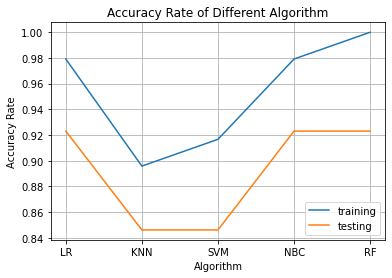

In [42]:
m=[training_data_accuracy1,training_data_accuracy2,training_data_accuracy3,training_data_accuracy4,training_data_accuracy5]
n=[testing_data_accuracy1,testing_data_accuracy2,testing_data_accuracy3,testing_data_accuracy4,testing_data_accuracy5]
lebel=['LR','KNN','SVM','NBC','RF']
plt.plot(lebel,m,label='training')
plt.plot(lebel,n,label='testing')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate of Different Algorithm')
plt.legend()
plt.grid(True)
plt.show()

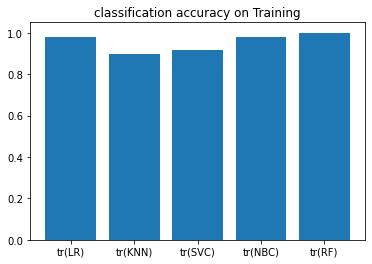

In [43]:
import matplotlib.pyplot as plt
x=["tr(LR)","tr(KNN)","tr(SVC)","tr(NBC)","tr(RF)"]
h=[0.9791666666666666, 0.8958333333333334,0.9166666666666666,0.9791666666666666,1.0 ]
plt.bar(x,h)
 

plt.title("classification accuracy on Training")
plt.show()

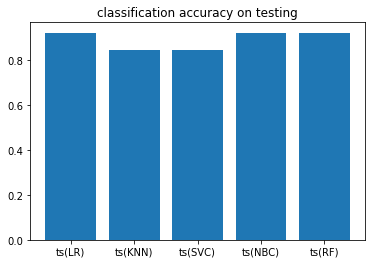

In [44]:
import matplotlib.pyplot as plt
x=["ts(LR)","ts(KNN)","ts(SVC)","ts(NBC)","ts(RF)"]
h=[ 0.9230769230769231,0.8461538461538461, 0.8461538461538461,0.9230769230769231,0.9230769230769231]
plt.bar(x,h)
 

plt.title("classification accuracy on testing")
plt.show()